  <h1> <i> <p style="text-align:center;"> Goodreads data set Visualization </p></i></h1> 


<img src="books.jpg">

<h2> Here I have used different visualization techniques to data set provided by goodreads.</h2>
<h3>What will you discover from this analysis?<h3>
1.Most occuring books in the dataset.<br>
2.Most prefered languages by the writer.<br>
3.Most rated books.<br>
4.Authors with most books.<br>
5.Highly rated author.<br>
6.Books ratings in histoplot.<br>
7.Books ratings in pie.<br>



<h3>[note: The analysis was performed on april 2020. The data sets might be updated and one can get different output.]

<h3>Now let's get started. In the first step we Import all the necessary library. You can also import any missing library when necessary so not need to worry about anything.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


<h3> Here we load the csv data set and ignore corrupted data. </h3>


In [2]:
books = pd.read_csv('books.csv', error_bad_lines = False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


<h3> Checking the number of rows and columns present in dataset</h3>

In [3]:
print("Dataset contains {} row and {} colums".format(books.shape[0],books.shape[1]))

Dataset contains 11123 row and 12 colums


In [4]:
books.head()



,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


<h3> We all know J.K. Rowling/Mary GrandPré by her common name .ie, J.K Rowling so to nullify the possiblitiy of ambiguty we have changed the name present in the data set to her common name.</h3>

In [5]:
books.replace(to_replace = 'J.K. Rowling/Mary GrandPré', value= 'J.K Rowling',inplace = True)

In [6]:
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K Rowling,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K Rowling,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K Rowling,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K Rowling,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


<h3> Importing seaborn</h3>

In [7]:
import seaborn as sns

<h3> Visualizing most occuring books using sns</h3>

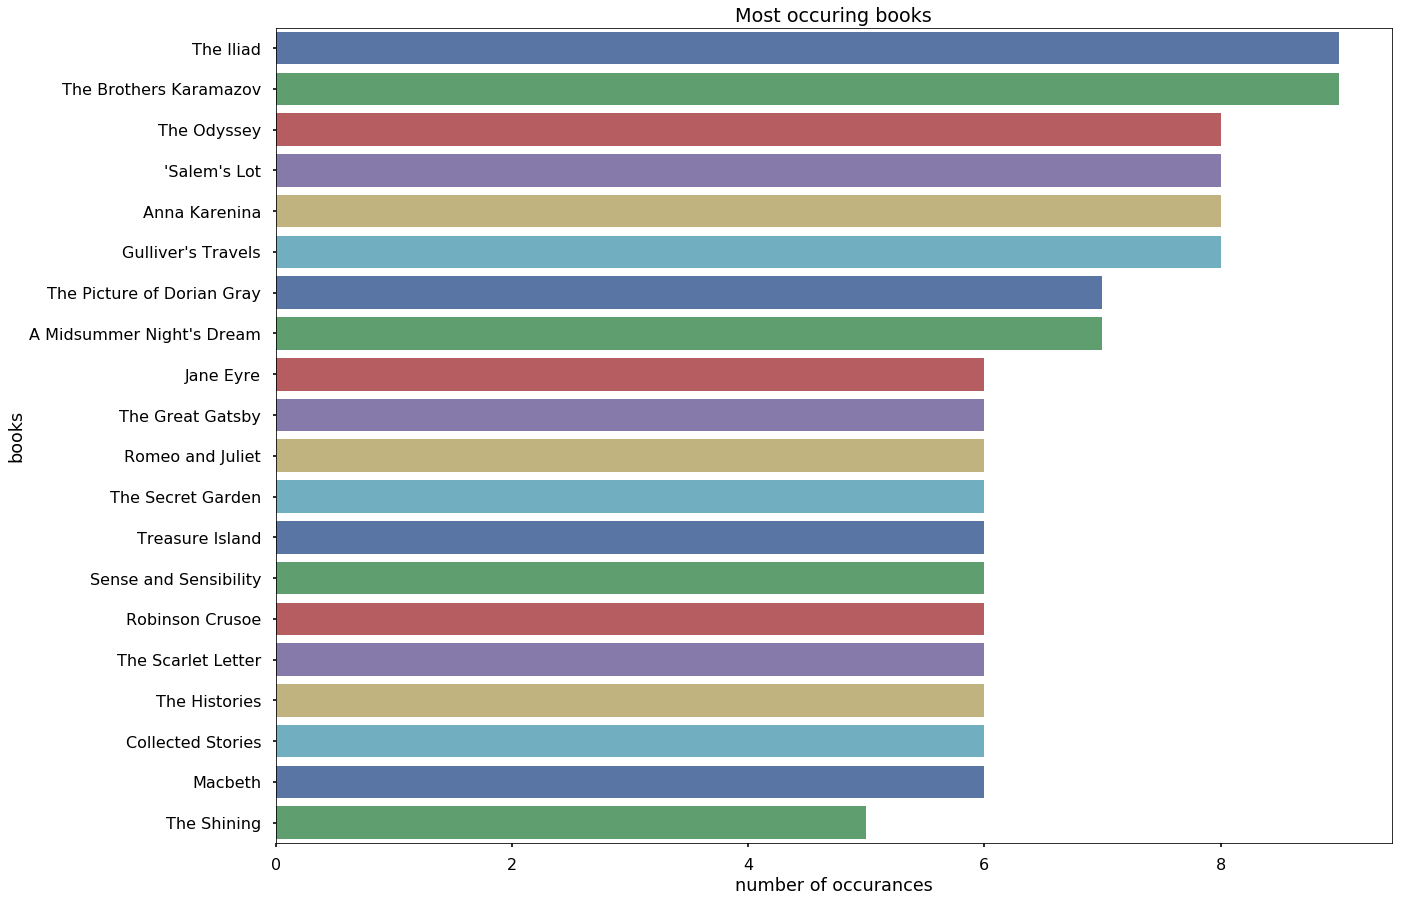

In [8]:
sns.set_context('poster')
plt.figure(figsize = (20,15))
book = books['title'].value_counts()[:20]
rating = books.average_rating[:20]
sns.barplot(x=book, y = book.index, palette = 'deep')
plt.title("Most occuring books")
plt.xlabel("number of occurances")
plt.ylabel("books")
plt.show()

<h3>We can see that the most occuring books are "The lliad", "The Brothers Karamazov" and "The Odyssey" and so on. <br>
Now we will look at the language prefered by the writers. </h3> 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

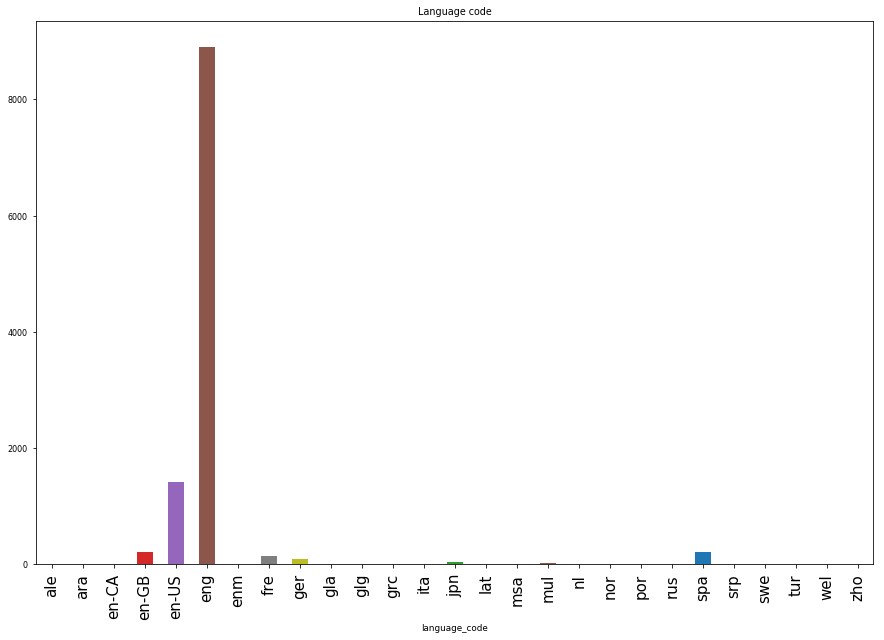

In [9]:
sns.set_context('paper')
plt.figure(figsize =(15,10))
ax = books.groupby('language_code')['title'].count().plot.bar()
plt.title('Language code')
plt.xticks(fontsize = 15)

<h3> From the bar graph above we can see that roughly more than 70% of the writer prefer english writing. Some prefer american english some spanish and so on.<p>
We have a ratings_count column in the data frame. Let's use it to see how well the books are rated and let's find the top rated books.</h3>  

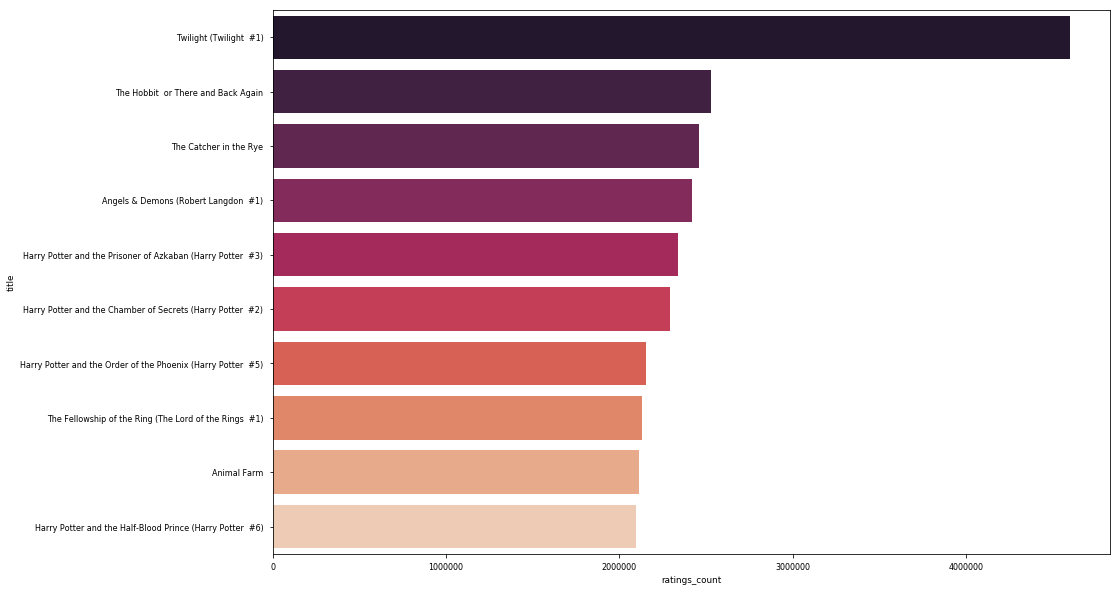

In [10]:
most_rated = books.sort_values('ratings_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
sns.barplot(most_rated['ratings_count'], most_rated.index, palette = 'rocket')

<h3> The above barplot shows the most voted books. Here are the few to give us better idea:<br>
    1. Twilight with more than 4 million votes.<br>
    2. The Hobbit or There and Back Again with more than 2 million votes.<br>
    3. The Catcher in the Rye with more than 2 million votes.<br>
    These are the top three books with most votes by the readers.</h3>
    
    

<h3> Now let's find out about the authors, espically the ones with the most books.</h3> 

Text(0.5,0,'Total number of books')

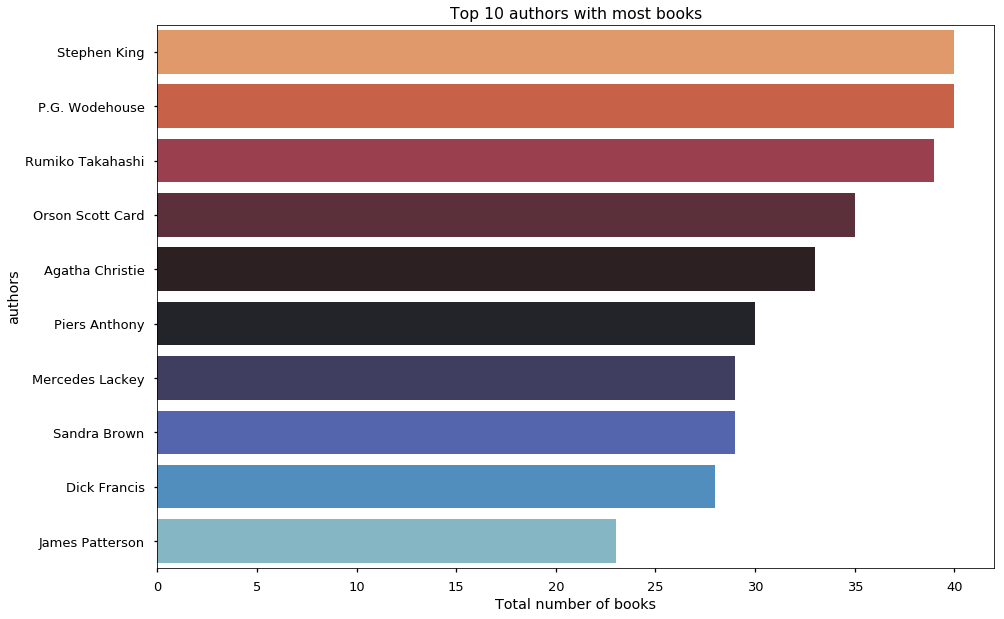

In [11]:
sns.set_context('talk')
most_books = books.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_books['title'], most_books.index, palette='icefire_r')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")

<h3> The above barplot shows that Stephen king and P.G Wodehouse have written the most books with plot showing nearly 40 books.</h3>

<h3> The above barplot shows that Stephen king and P.G Wodehouse have written the most books with plot showing nearly 40 books.</h3>

Text(0,0.5,'Authors')

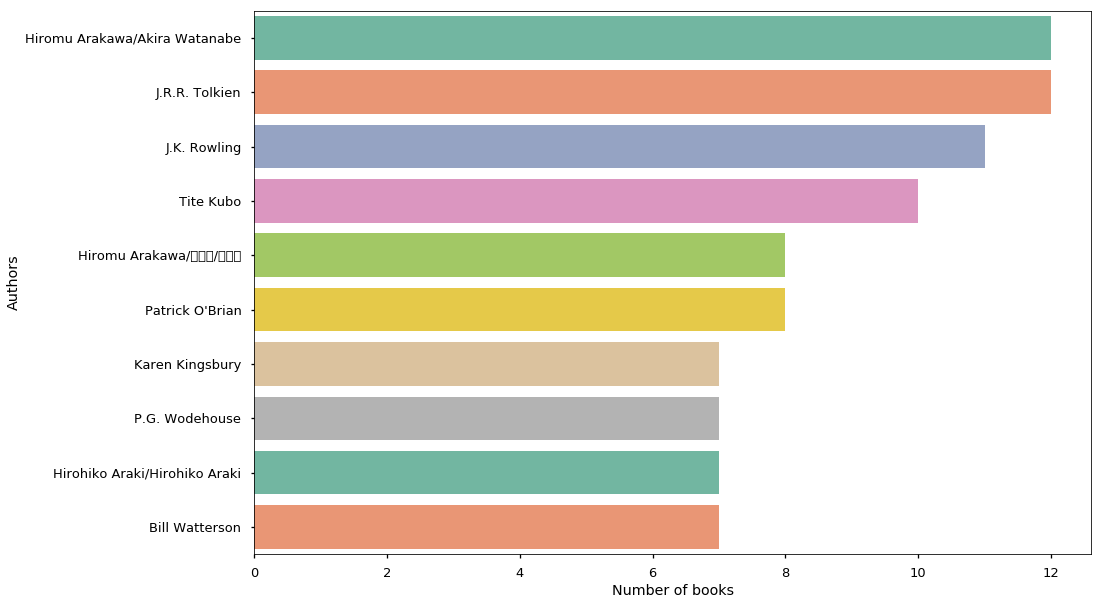

In [12]:
high_rated_author = books[books['average_rating']>=4.3]
high_rated_author = high_rated_author.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(high_rated_author['title'], high_rated_author.index, palette = 'Set2')
ax.set_xlabel("Number of books")
ax.set_ylabel("Authors")


<h3> Now checking to see the rating distribution for the books</h3>

In [13]:
def segregation(data):
    values=[]
    for val in data.average_rating:
        if val>=0 and val<=1:
            values.append("between 0 and 1")
        elif val>1 and val<=2:
            values.append("between 1 and 2")
        elif val>2 and val<=3:
            values.append("between 2 and 3")
        elif val>3 and val<=4:
            values.append("between 3 and 4")
        elif val>4 and val<=5:
            values.append("between 4 and 5")
        else:
            values.append("NaN")
    print(len(values))
    return values

<h3> A null value can effect the visualiztion so we must check them and remove them is any null value is present</h3> 

In [14]:
books.average_rating.isnull().value_counts()

False    11123
Name: average_rating, dtype: int64

In [15]:
books.dropna(0, inplace=True)

<h3> If any NaN value is present then it is dropped</h3>

<h3> Now we plot histogram to see the rating distribution of books</h3>

C:\Users\bibek\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


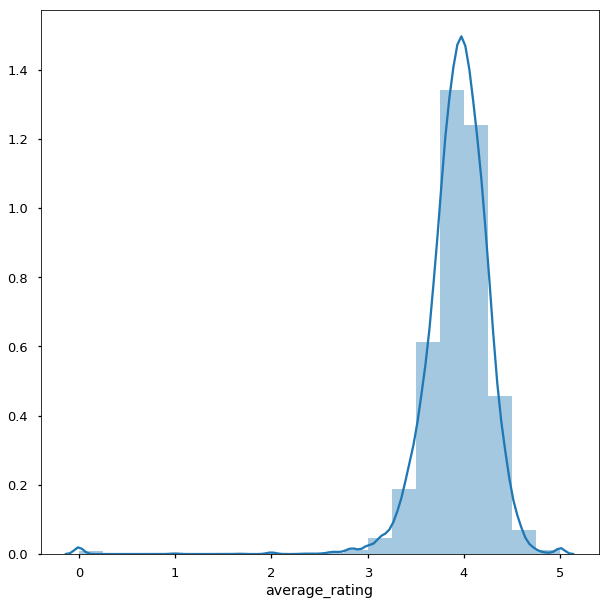

In [16]:
plt.figure(figsize=(10,10))
rating = books.average_rating.astype(float)
sns.distplot(rating, bins =20)

<h3> From the above histoplot we can clearly see that the ratings between 3-4 is highest. So, we can conclude that readers love the books they are reading.</h3>

<h3> Now let's use circle to visualize the data that supports the output provided by the histoplot.</h3>

11123


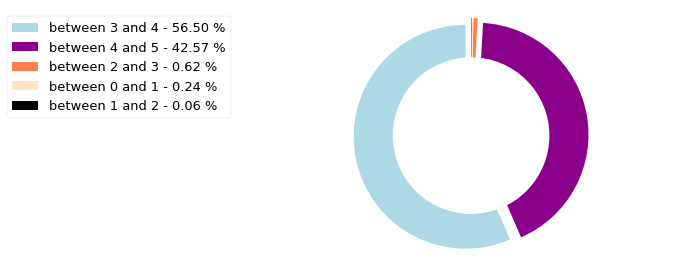

In [17]:
books['Ratings_Dist'] = segregation(books)
ratings_pie = books['Ratings_Dist'].value_counts().reset_index()
labels = ratings_pie['index']
colors = ['lightblue','darkmagenta','coral','bisque', 'black']
percent = 100.*ratings_pie['Ratings_Dist']/ratings_pie['Ratings_Dist'].sum()
fig, ax1 = plt.subplots()
ax1.pie(ratings_pie['Ratings_Dist'],colors = colors, 
        pctdistance=0.85, startangle=90, explode=(0.05, 0.05, 0.05, 0.05, 0.05))
#Draw a circle now:
centre_circle = plt.Circle((0,0), 0.70, fc ='white')
fig1 = plt.gcf()
fig1.gca().add_artist(centre_circle)
#Equal Aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.tight_layout()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]
plt.legend( labels, loc = 'best',bbox_to_anchor=(-0.1, 1.),)